In [1]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# 분류, 군집

In [2]:
from sklearn.datasets import load_iris

In [3]:
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

그림 저장: classification_vs_clustering_plot


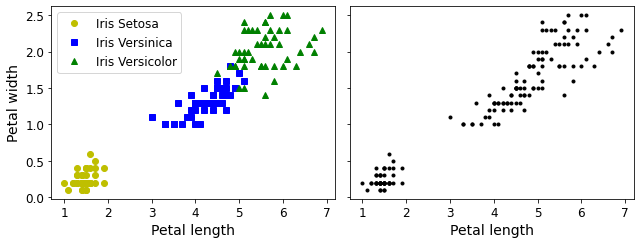

In [4]:
plt.figure(figsize = (9,3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0,3],'yo', label = 'Iris Setosa')
plt.plot(X[y==1, 2], X[y==1,3],'bs', label = 'Iris Versinica')
plt.plot(X[y==2, 2], X[y==2,3],'g^', label = 'Iris Versicolor')
plt.xlabel('Petal length', fontsize = 14)
plt.ylabel('Petal width', fontsize = 14)
plt.legend(fontsize = 12)

plt.subplot(122)
plt.scatter(X[:,2], X[:,3], c='k', marker = '.')
plt.xlabel('Petal length', fontsize = 14)
plt.tick_params(labelleft = False)

save_fig('classification_vs_clustering_plot')
plt.show()

- 왼쪽의 그래프는 레이블이 있음(setosa, versinica, versicolor)
 - 레이블이 있으면 지도학습 가능(분류)
- 오른쪽의 그래프는 레이블에 대한 정보를 알 수 없음 
 - 지도학습이 불가능 즉, 비지도 학습

#### 가우시안 혼합 모델을 통해 3개의 클러스터를 잘 나눌 수 있음
- 이 때, 꽃잎 길이와 너비, 꽃받침 길이와 너비 4개의 특성을 모두 사용

In [5]:
from sklearn.mixture import GaussianMixture

In [6]:
y_pred = GaussianMixture(n_components = 3, random_state = 42).fit(X).predict(X)
mapping_index = [np.argmax(np.bincount(y_pred[n:n+50])) for n in range(0,150,50)]
mapping = {mapping_index[i]:i for i in [0,1,2]}
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

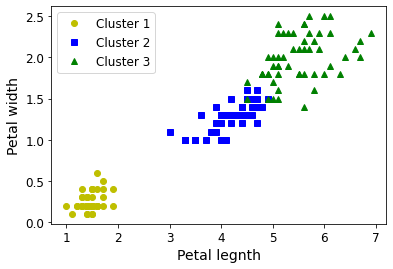

In [7]:
plt.plot(X[y_pred ==0, 2], X[y_pred == 0 , 3], 'yo', label = 'Cluster 1')
plt.plot(X[y_pred ==1, 2], X[y_pred == 1 , 3], 'bs', label = 'Cluster 2')
plt.plot(X[y_pred ==2, 2], X[y_pred == 2 , 3], 'g^', label = 'Cluster 3')
plt.xlabel('Petal legnth', fontsize = 14)
plt.ylabel('Petal width', fontsize = 14)
plt.legend(loc = 'upper left', fontsize = 12)
plt.show()

- 약간의 오차는 존재하지만 오른쪽의 두 cluster들이 잘 구분되었다고 볼 수 있음

In [8]:
np.sum(y_pred == y) # 145개의 샘플에 대해서 제대로 clustering이 되었음

145

In [9]:
np.sum(y_pred == y)/ len(y_pred) # 96.7%의 정확성을 갖고있음

0.9666666666666667

# K-평균
- 가장 대표적인 클러스터링 알고리즘 중 하나

In [10]:
from sklearn.datasets import make_blobs

In [11]:
blob_centers = np.array(
[[0.2, 2.3],
 [-1.5, 2.3],
 [-2.8, 1.8],
 [-2.8, 2.8],
 [-2.8, 1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [13]:
X, y = make_blobs(n_samples = 2000, centers = blob_centers,
                  cluster_std = blob_std, random_state = 7)

In [17]:
def plot_clusters(X, y = None) :
    plt.scatter(X[:,0], X[:,1], c = y, s = 1)
    plt.xlabel("$x_1$", fontsize = 14)
    plt.ylabel("$x_2$", fontsize = 14, rotation = 0)

- 5개의 클러스터 생성

그림 저장: blobs_plot


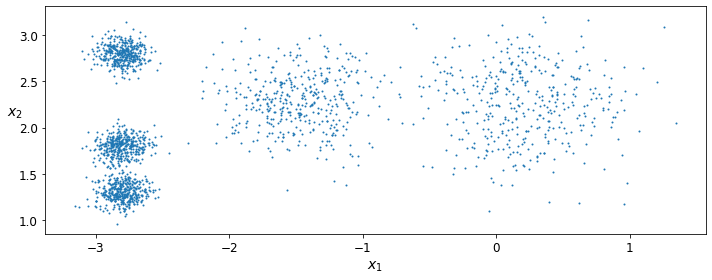

In [18]:
plt.figure(figsize = (10,4))
plot_clusters(X)
save_fig('blobs_plot')
plt.show()

### 훈련과 예측
- K\-평균 군집 알고리즘 훈련
- 이 알고리즘은 클러스터 중심을 찾고 각 샘플을 가까운 클러스터에 할당

In [19]:
from sklearn.cluster import KMeans

In [21]:
k = 5
kmeans = KMeans(n_clusters = k, random_state = 42)
y_pred = kmeans.fit_predict(X)

In [23]:
y_pred # 각 샘플이 5개의 클러스터 중 하나에 할당됨

array([0, 4, 1, ..., 2, 1, 4])

In [24]:
y_pred is kmeans.labels_ # 예측값이 kmeans.labels와 동일

True

#### 5개의 센트로이드(클러스터 중심)을 찾았음

In [26]:
kmeans.cluster_centers_

array([[-2.80037642,  1.30082566],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80389616,  1.80117999]])

- KMeans 객체는 훈련한 샘플의 레이블을 가지고 있음
- 여기서 샘플의 레이블은 샘플에 할당한 클러스터의 인덱스

In [27]:
kmeans.labels_

array([0, 4, 1, ..., 2, 1, 4])

### 새로운 샘플의 레이블을 예측할 수 있음
- 가장 가까운 센트로이드를 찾아서 그 센트로이드의 인덱스 반환

In [29]:
X_new = np.array([[0,2],[3,2],[-3,3],[-3,2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2])

# 결정 경계
- 평면을 가장 가까운 점의 집합으로 분할

In [30]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, 
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

그림 저장: voronoi_plot


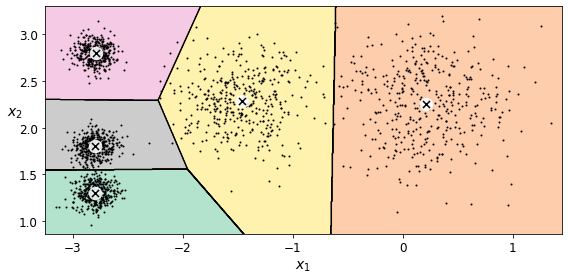

In [31]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
save_fig("voronoi_plot")
plt.show()

- 일부 샘플은 잘못 클러스터링 된 것처럼 보이긴 하지만 전반적으로 아주 잘 클러스터링 되었음

### 하드 군집 vs 소프트 군집
- 하드 군집은 각 샘플에 대해 가장 가까운 클러스터를 선택
- 이 대신 샘플에서 5개의 센트로이드까지 거리를 측정하는 것이 나을 수 있음
- transform() 메서드에서 이 거리를 계산

In [32]:
kmeans.transform(X_new) # 4개의 샘플에 대해 5개의 센트로이드까지의 거리

array([[2.88633901, 0.32995317, 2.9042344 , 1.49439034, 2.81093633],
       [5.84236351, 2.80290755, 5.84739223, 4.4759332 , 5.80730058],
       [1.71086031, 3.29399768, 0.29040966, 1.69136631, 1.21475352],
       [1.21567622, 3.21806371, 0.36159148, 1.54808703, 0.72581411]])

- 이 거리가 샘플과 센트로이드 사이의 유클리드 거리인지 확인할 수 있음

In [34]:
np.linalg.norm(np.tile(X_new, (1,k)).reshape(-1,k,2) - kmeans.cluster_centers_, axis = 2)

array([[2.88633901, 0.32995317, 2.9042344 , 1.49439034, 2.81093633],
       [5.84236351, 2.80290755, 5.84739223, 4.4759332 , 5.80730058],
       [1.71086031, 3.29399768, 0.29040966, 1.69136631, 1.21475352],
       [1.21567622, 3.21806371, 0.36159148, 1.54808703, 0.72581411]])

- 두 값이 동일하다
 - 즉,  transform() 메서드는 유클리드 거리를 이용

# K\-평균 알고리즘

- k\-평균 알고리즘은 가장 빠른 군집이면서 가장 간단한 알고리즘 중 하나임
 - 먼저 $k$개의 센트로이드를 랜덤하게 초기화:데이터셋에서 $k$개의 샘플을 랜덤하게 선택하고 센트로이드를 그 위치에 놓음
 - 수렴할 때까지 다음을 반복(센트로이드가 더이상 이동하지 않을 때까지)
   - 각 샘플을 가장 가까운 센트로이드에 할당
   - 센트로이드에 할당된 샘플의 평균으로 센트로이드 업데이트

- K\-평균 알고리즘을 1,2,3회 반복하고 센트로이드가 어떻게 움직이는지 관찰

In [36]:
kmeans_iter1 = KMeans(n_clusters = 5, init = 'random', n_init = 1,
                      algorithm = 'full', max_iter = 1, random_state = 9)
kmeans_iter2 = KMeans(n_clusters = 5, init = 'random', n_init = 1,
                      algorithm = 'full', max_iter = 2, random_state = 9)
kmeans_iter3 = KMeans(n_clusters = 5, init = 'random', n_init = 1,
                      algorithm = 'full', max_iter = 3, random_state = 9)

kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=9)

- 그래프

그림 저장: kmeans_algorithm_plot


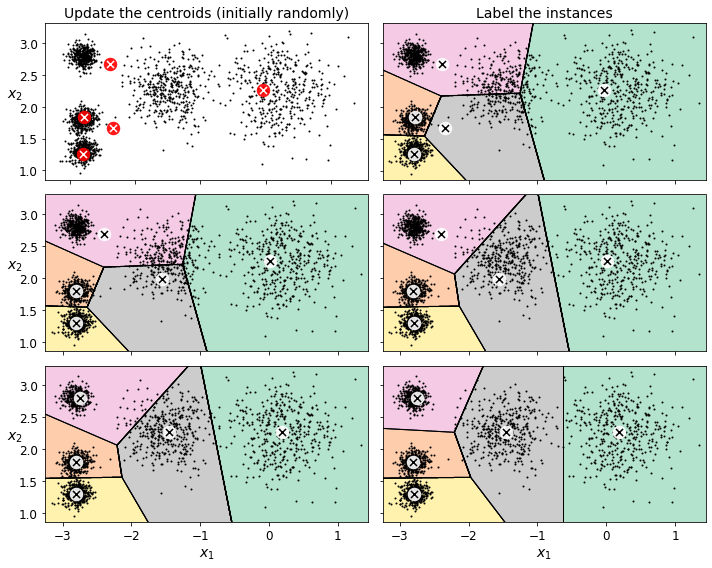

In [37]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

save_fig("kmeans_algorithm_plot")
plt.show()

### K-평균의 변동성

- 원래 K\-평균 알고리즘에서는 센트로이드가 랜덤하게 초기화되고 알고리즘은 단순히 한 번씩 반복하여 센트로이드를 개선
- 이 방식의 문제점은 K\-평균을 여러 번(또는 다른 랜덤 시드로) 실행하면 매우 다른 결과를 얻게 됨

In [38]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

그림 저장: kmeans_variability_plot


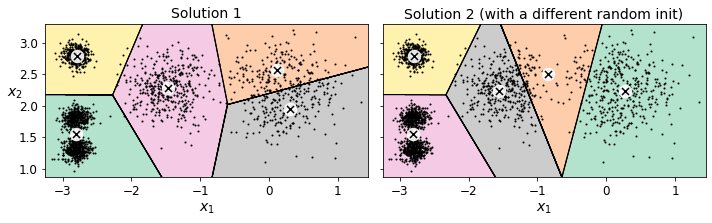

In [39]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=42)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=51)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

save_fig("kmeans_variability_plot")
plt.show()

# 이너셔
- 최선의 모델을 선택하기 위해서는 K\-평균 모델의 성능을 평가할 방법이 있어야 함
- 하지만 군집은 비지도 학습이기 때문에 타깃이 없음

#### 하지만 적어도 각 샘플과 센트로이드 사이의 거리는 측정할 수 있는데, 이것이 이니셔 지표의 아이디어

In [42]:
kmeans.inertia_

211.5985372581683

- 이너셔는 각 훈련 샘플과 가장 가까운 센트로이드 사이의 제곱 거리의 합으로 쉽게 검증할 수 있음

In [43]:
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

211.59853725816856

#### score() 메서드는 음의 이너셔 반환
- 음의 이너셔 반환하는 이유는 이너셔는 작을수록 좋지만 사이킷런의 score() 메서드는 항상 **클수록 좋은 것**이라는 규칙을 따라야 하기 때문

In [44]:
kmeans.score(X)

-211.5985372581683

# 다중 초기화

- 변동성 이슈를 해결하는 한 가지 방법은 단순히 K\-평균 알고리즘을 랜덤 초기화를 다르게 하여 여러 번 실행하고 가장 작은 이너셔를 만드는 솔루션을 선택하는 것
- 예를 들어, 앞의 모델들의 두 개의 이너셔는 다음과 같다

In [45]:
kmeans_rnd_init1.inertia_

219.50265127189653

In [46]:
kmeans_rnd_init2.inertia_

236.63519259650332

- 앞에서 훈련한 **좋은** 모델보다 이너셔값이 높음
- 즉, 더 나쁜 모델

n_init 매개변수를 지정하면 사이킷런은 원래 알고리즘을 n_init번 실행하고 이너셔가 가장 작은 솔루션을 선택
- 이 매개변수의 기본값은 n_init = 10

In [47]:
kmeans_rnd_10_inits = KMeans(n_clusters = 5, init = 'random', n_init = 10,
                             algorithm = 'full', random_state = 11)
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='full', init='random', n_clusters=5, random_state=11)

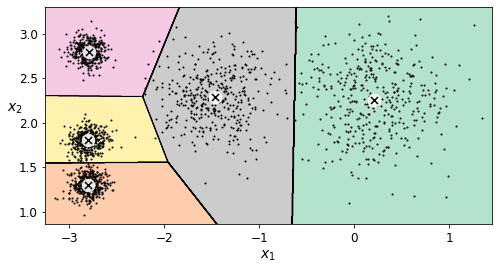

In [48]:
plt.figure(figsize = (8,4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

처음에 만들었던 모델이 얻어졌음

즉, 이 모델이 최적의 K\-평균 결과로 보임

# K\-평균++

센트로이드를 완전히 랜덤하게 초기화하는 대신 David Arthur와 Sergei Vassilvitskii가 [2006년 논문](https://goo.gl/eNUPw6)에서 제안한 다음 알고리즘을 사용해 초기화하는 것이 더 좋음
* 데이터셋에서 무작위로 균등하게 하나의 센트로이드 $c_1$을 선택
* $D^2(\mathbf{x}_i)$ / $\sum\limits_{j=1}^{m}{D(\mathbf{x}_j)}^2$의 확률로 샘플 $\mathbf{x}_i$를 새로운 센트로이드 $c_i$로 선택
 * 여기에서 $D(\mathbf{x}_i)$는 샘플 $\mathbf{x}_i$에서 이미 선택된 가장 가까운 센트로이드까지 거리
 * 이 확률 분포는 이미 선택한 센트로이드에서 멀리 떨어진 샘플을 센트로이드로 선택할 가능성을 높임
* $k$ 개의 센트로이드를 선택할 때까지 이전 단계를 반복

K-평균++ 알고리즘의 나머지는 일반 K-평균과 같다

이 초기화 방식을 사용하면 K-평균 알고리즘이 최적의 솔루션에 수렴할 가능성이 훨씬 높아짐

따라서 n_init 값을 상당히 줄일 수 있음

대부분의 경우 n_init를 줄이는 것이 초기화 과정에 추가된 복잡도를 보상

#### K\-평균++ 초기화를 사용하려면 간단하게 init = 'k-means++'로 지정(이 값이 기본값임)

In [51]:
KMeans()

KMeans()

In [53]:
good_init = np.array([[-3,3],[-3,2],[-3,1],[-1,2],[0,2]])
kmeans = KMeans(n_clusters = 5, init = good_init, n_init = 1, random_state = 42)
kmeans.fit(X)
kmeans.inertia_

211.62337889822365

# K\-평균 속도 개선
- K\-평균 알고리즘은 불필요한 거리 계산을 많이 피하는 식으로 속도를 크게 높일 수 있음
- 이를 위해 **삼각 부등식**을 이용
 - 3개의 점 A,B,C에 대해 거리 AC는 항상 AC ≤ AB + BC 만족
- 그리고 샘플과 센트로이드 사이 거리의 최솟값과 최댓값 유지

Elkan의 K\-평균 방식을 사용하려면 algorithm = 'elkan'

이 방법은 희소 행렬을 지원하지 않음
- 따라서 사이킷런은 밀집 배열에는 elkan 사용하고 희소 행렬에는 기본 알고리즘인 full 사용

In [54]:
%timeit -n 50 KMeans(algorithm = 'elkan').fit(X)

175 ms ± 10.9 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [55]:
%timeit -n 50 KMeans(algorithm = 'full').fit(X)

355 ms ± 29.8 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


# 미니배치 K-평균

In [56]:
from sklearn.cluster import MiniBatchKMeans

In [57]:
minibatch_kmeans = MiniBatchKMeans(n_clusters = 5, random_state = 42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

In [58]:
minibatch_kmeans.inertia_

211.93186531476786

#### 데이터셋이 메모리에 다 들어가지 못한다면 가장 간단한 방법은 점진적 PCA처럼 memmap 클래스 사용

In [60]:
import urllib.request
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version = 1)
mnist.target = mnist.target.astype(np.int64)

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    mnist['data'], mnist['target'], random_state = 42)

- memmap에 데이터 기록

In [80]:
filename = 'my_mnist.data'

X_mm = np.memmap(filename, dtype = 'float32', mode = 'write', shape = X_train.shape)
X_mm[:] = X_train

OSError: [Errno 22] Invalid argument: 'my_mnist.data'

In [81]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10, random_state=42)
minibatch_kmeans.fit(X_mm)

NameError: name 'X_mm' is not defined

- 데이터가 너무 커서 memmap을 사용할 수 없는 경우

In [82]:
def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]

- 한 번에 하나의 배치를 모델에 주입하여 훈련 가능
- 또한 여러 번 초기화를 수행하고 이너셔가 가장 낮은 모델 선택

In [83]:
np.random.seed(42)

In [84]:
k = 5
n_init = 10
n_iterations = 100
batch_size = 100
init_size = 500  # K-Means++ 초기화를 위해 충분한 데이터 전달
evaluate_on_last_n_iters = 10

best_kmeans = None

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)

    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

In [85]:
best_kmeans.score(X)

-211.70999744411446

In [86]:
%timeit KMeans(n_clusters=5).fit(X)

102 ms ± 2.58 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [87]:
%timeit MiniBatchKMeans(n_clusters=5).fit(X)

55.8 ms ± 6.65 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


훨씬 빠른 것을 알 수 있음

하지만 성능이 낮은(즉, 이너셔가 낮은) 경우가 많음
- 특히 k가 증가할수록 더 그런 현상이 잘 나타남


- 미니배치 K\-평균과 일반 K\-평균의 이너셔와 훈련 시간 그래프로 표시

In [89]:
from timeit import timeit

In [91]:
times = np.empty((100,2))
inertias = np.empty((100,2))
for k in range(1,101) :
    kmeans_ = KMeans(n_clusters = k, random_state = 42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters = k, random_state = 42)
    print("\r{}/{}".format(k,100), end = "")
    times[k-1,0] = timeit('kmeans_.fit(X)', number = 10, globals = globals())
    times[k-1,1] = timeit('minibatch_kmeans.fit(X)', number = 10, globals = globals())
    inertias[k-1,0] = kmeans_.inertia_
    inertias[k-1,1] = minibatch_kmeans.inertia_

100/100

그림 저장: minibatch_kmeans_vs_kmeans


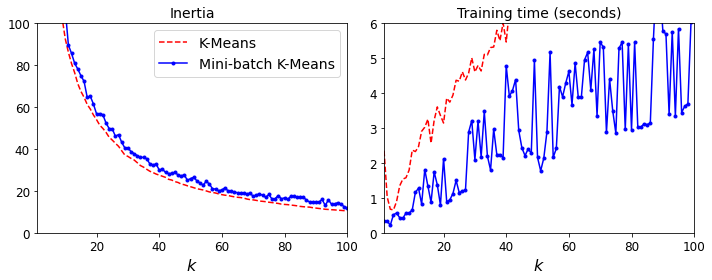

In [94]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(range(1, 101), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Inertia", fontsize=14)
plt.legend(fontsize=14)
plt.axis([1, 100, 0, 100])

plt.subplot(122)
plt.plot(range(1, 101), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Training time (seconds)", fontsize=14)
plt.axis([1, 100, 0, 6])

save_fig("minibatch_kmeans_vs_kmeans")
plt.show()

- 상대적으로 미니배치 K\-평균법의 이너셔 값이 더 높음
- 반면에 미니배치 K\-평균법의 훈련 시간이 훨씬 짧은 장점이 있음

# 최적의 클러스터 개수 찾기

그림 저장: bad_n_clusters_plot


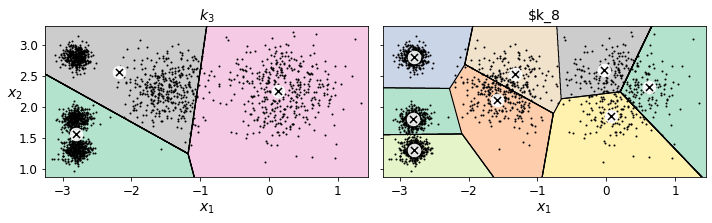

In [95]:
kmeans_k3 = KMeans(n_clusters = 3, random_state = 42)
kmeans_k8 = KMeans(n_clusters = 8, random_state = 42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, '$k_3$','$k_8')
save_fig('bad_n_clusters_plot')
plt.show()

- 두 모델 다 좋은 모델이라고 볼 수 없음
- 이너셔 확인

In [96]:
kmeans_k3.inertia_

653.2223267580945

In [97]:
kmeans_k8.inertia_

118.44108623570084

실제 클러스터 개수가 늘어날수록 샘플은 인접한 센트로이드에 더 가까움

즉, 클러스터 개수를 늘리면 이너셔는 줄어들기 때문에 이너셔 자체가 모델 성능의 절대적인 지표가 될 수는 없음

k가 줄어들수록 이너셔가 얼마나 증가하는지 확인(Elbow)

In [99]:
kmeans_per_k = [KMeans(n_clusters = k, random_state = 42).fit(X)
                   for k in range(1,10)]
inertias = [model.inertia_ for model in kmeans_per_k]

그림 저장: inertia_vs_k_plot


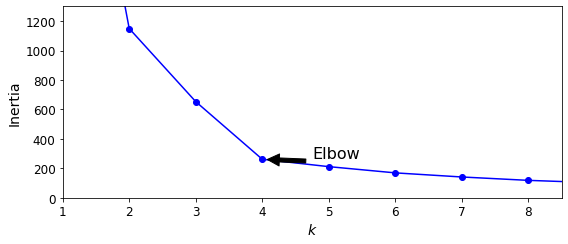

In [108]:
plt.figure(figsize = (8,3.5))
plt.plot(range(1,10), inertias, 'bo-')
plt.xlabel('$k$', fontsize = 14)
plt.ylabel('Inertia', fontsize = 14)
plt.annotate('Elbow',
             xy = (4, inertias[3]),
             xytext = (0.55,0.35),
             textcoords = 'figure fraction',
             fontsize = 16,
             arrowprops = dict(facecolor = 'black', shrink = 0.1)
            )
plt.axis([1,8.5,0,1300])

save_fig('inertia_vs_k_plot')
plt.show()

k=4에서 엘보우가 존재. 이 값보다 클러스터가 작으면 나쁘다는 뜻이며, 이보다 더 많으면 크게 도움이 되지 않는다는 뜻임
- 따라서 k=4가 아주 좋은 선택이라고 볼 수 있지만 당연히 완벽하지는 않음
- 이 예제에서는 왼쪽 아래 두 클러스터가 하나의 클러스터로 간주되긴 했지만 꽤 좋은 결과라고 볼 수 있음

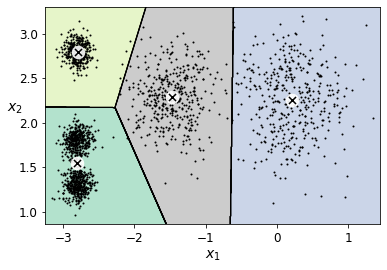

In [111]:
plot_decision_boundaries(kmeans_per_k[4-1],X)
plt.show()

또 다른 방법은 모든 샘플에 대한 실루엣 계수의 평균인 **실루엣 점수**

- 한 샘플의 실루엣 점수 :
$
\dfrac{(b-a)}{max(a,b)}
$
    
    
$
\begin{cases}
a\text{는 같은 클러스터에 있는 다른 샘플까지의 평균 거리(클러스터 내부 평균 거리)} \\
b\text{는 가장 가까운 클러스터까지 평균 거리}
\end{cases}
$

실루엣 계수는 -1부터 1까지의 값을 가지는데, +1에 가까우면 샘플이 다른 클러스터로부터 떨어져 자신의 클러스터 안에 잘 있다는 것을 의미하며 0에 가까우면 클러스터 경계에 가깝다는 의미, -1에 가까우면 샘플이 잘못된 클러스터에 할당되었을 수도 있음

- k에 대한 실루엣 점수의 그래프

In [119]:
from sklearn.metrics import silhouette_score

In [120]:
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [121]:
silhouette_scores = [silhouette_score(X, model.labels_)
                    for model in kmeans_per_k[1:]]

그림 저장: silhouette_score_vs_k_plot


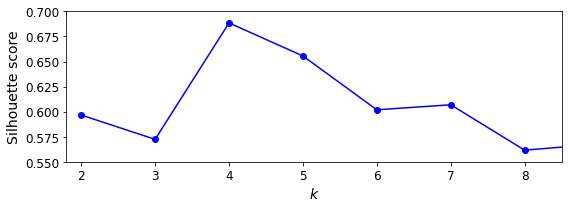

In [122]:
plt.figure(figsize = (8,3))
plt.plot(range(2,10), silhouette_scores, 'bo-'),
plt.xlabel('$k$', fontsize = 14)
plt.ylabel('Silhouette score', fontsize = 14)
plt.axis([1.8,8.5,0.55,0.7])
save_fig('silhouette_score_vs_k_plot')
plt.show()

마찬가지로 k=4일 때 실루엣 점수가 가장 높으며, k=5에 대해서도 좋은 점수임을 알 수 있음
- 실루엣 점수도 완벽하지 않음(실루엣 점수는 원형의 클러스터에 잘 맞기 때문에 클러스터의 모양이 원형이 아니면 잘 맞지 않음)

모든 샘플의 실루엣 계수를 할당된 클러스터와 실루엣 값으로 정렬하여 그리면 훨씬 많은 정보를 얻을 수 있는데 이를 실루엣 다이어그램이라고 함

그림 저장: silhouette_analysis_plot


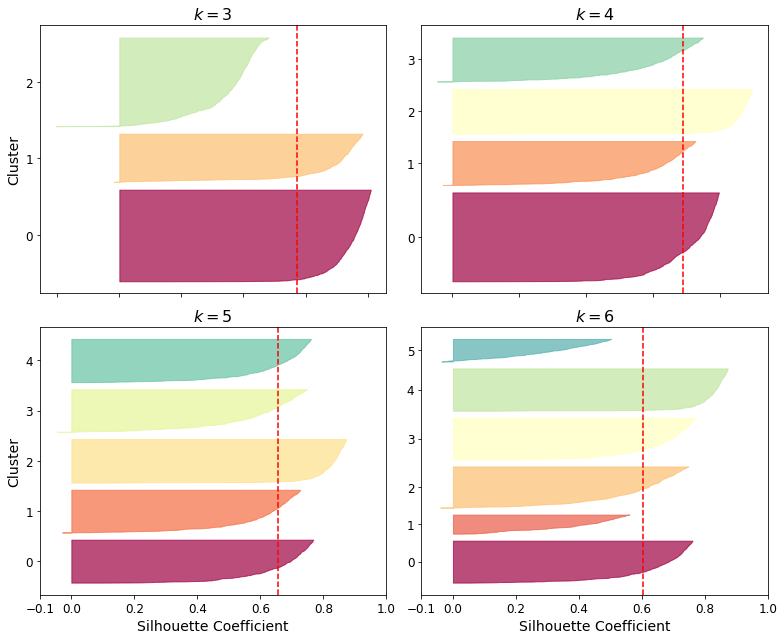

In [124]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

save_fig("silhouette_analysis_plot")
plt.show()

이 그래프의 높이는 클러스터가 포함한 샘플의 수를 의미하고 너비는 클러스터에 포함된 샘플의 정렬된 실루엣 계수를 보여줌(넓을수록 좋음)

빨간색 수직 파선의 왼쪽에서 멈추는 클러스터가 있다는 것은 클러스터의 샘플이 다른 클러스터와 너무 가깝다는 것을 의미하므로 좋지 않은 모델임. 이 기준으로 봤을 때는 k=4, k=5 두 가지 모델이 적절해보임

실루엣 점수들이 대부분 비슷하고 다이어그램들의 길이나 너비도 비교적 균일한 k=5가 가장 좋은 모델이라고 판단할 수 있음

# K-평균의 한계

In [126]:
X1, y1 = make_blobs(n_samples = 1000, centers = ((4,-4), (0,0)), random_state = 42)
X1 = X1.dot(np.array([[0.374,0.95],[0.732,0.598]]))
X2, y2 = make_blobs(n_samples = 250, centers = 1, random_state = 42)
X2 = X2 + [6,-8]
X = np.r_[X1,X2]
y = np.r_[y1,y2]

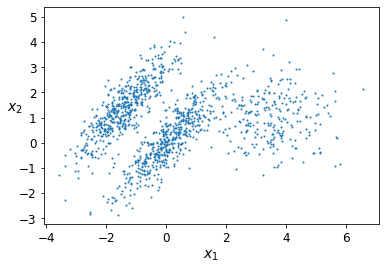

In [127]:
plot_clusters(X)

In [128]:
kmeans_good = KMeans(n_clusters = 3, init = np.array([[-1.5,2.5],[0.5,0],[4,0]]), n_init = 1, random_state = 42)
kmeans_bad = KMeans(n_clusters = 3, random_state = 42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(n_clusters=3, random_state=42)

- 센트로이드를 알고 있는 경우, 모르는 경우 두 가지에 대한 그래프

그림 저장: bad_kmeans_plot


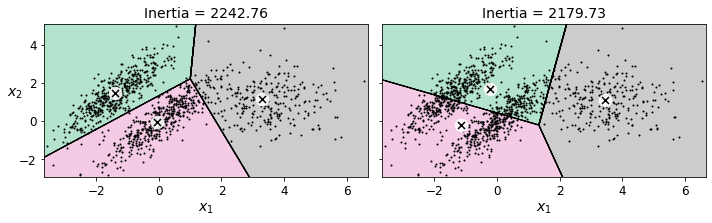

In [133]:
plt.figure(figsize = (10,3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good,X)
plt.title('Inertia = {:.2f}'.format(kmeans_good.inertia_), fontsize = 14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad,X, show_ylabels = False)
plt.title('Inertia = {:.2f}'.format(kmeans_bad.inertia_), fontsize = 14)

save_fig('bad_kmeans_plot')
plt.show()

원형에서 벗어난 클러스터에 대해서는 스케일링을 통해서 원형으로 만들어주면 더 성능이 향상될 수 있음

# 군집을 사용한 이미지 분할

In [134]:
# 무당벌레 이미지를 다운로드
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\unsupervised_learning\\ladybug.png',
 <http.client.HTTPMessage at 0x1d90aa17a90>)

In [135]:
from matplotlib.image import imread
image = imread(os.path.join(images_path, filename))
image.shape

(533, 800, 3)

In [136]:
X = image.reshape(-1, 3) # 컬러 차원을 유지하고, 가로 세로를 없앤다
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [138]:
segmented_imgs = []
n_colors = (10,8,6,4,2)
for n_clusters in n_colors :
    kmeans = KMeans(n_clusters = n_clusters, random_state = 42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

그림 저장: image_segmentation_diagram


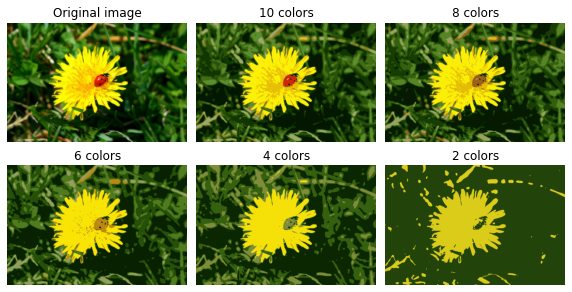

In [139]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

save_fig('image_segmentation_diagram', tight_layout=False)
plt.show()

# 군집을 사용한 전처리

MNIST와 유사하게 숫자 0에서 9까지 8x8 흑백 이미지 1797개로 이루어진 숫자 데이터 다뤄보기

In [140]:
from sklearn.datasets import load_digits

In [141]:
X_digits, y_digits = load_digits(return_X_y = True)

- 훈련 세트와 테스트 세트로 분할

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state = 42)

- 로지스틱 회귀 모델을 훈련하고 테스트 세트에서 평가

In [147]:
from sklearn.linear_model import LogisticRegression

In [148]:
log_reg = LogisticRegression(multi_class = 'ovr', solver = 'lbfgs', max_iter = 5000, random_state = 42)
log_reg.fit(X_train,y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [149]:
log_reg.score(X_test, y_test)

0.9688888888888889

기본 모델의 정확도 96.89%

K\-평균을 전처리 단계로 사용해 정확도를 더 향상할 수 있는지 확인

훈련 세트를 50개의 클러스터로 만들고 이미지를 이 클러스터까지 거리로 바꾼 다음 로지스틱 회귀 모델을 적용하는 파이프라인 생성

In [151]:
from sklearn.pipeline import Pipeline

In [152]:
pipeline = Pipeline([
    ('kmeans', KMeans(n_clusters = 50, random_state = 42)),
    ('log_reg', LogisticRegression(multi_class = 'ovr', solver = 'lbfgs', max_iter = 5000, random_state = 42)),
])
pipeline.fit(X_train,y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=42)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [153]:
pipeline.score(X_test, y_test)

0.98

정확도가 98%까지 증가

In [159]:
#3.1%에서 2%로 오차율 약 35%감소
1 - (1 - 0.98) / (1 - 0.969)

0.3548387096774194

앞에서는 k의 개수를 임의로 결정했기 때문에 더 나은 방법을 찾을 필요가 있음

K\-평균을 분류 파이프라인에서 전처리 단계로 사용했기 때문에 좋은 k값은 분류 성능이 가장 높아지게 만드는 k값임(GridSearch 이용)

In [161]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters = range(2,100))
grid_clf = GridSearchCV(pipeline, param_grid, cv = 3, verbose = 2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.2s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.2s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.2s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.2s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.2s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.2s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.2s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.2s
[CV] 

[CV] ............................ kmeans__n_clusters=21, total=   2.4s
[CV] kmeans__n_clusters=22 ...........................................
[CV] ............................ kmeans__n_clusters=22, total=   2.6s
[CV] kmeans__n_clusters=22 ...........................................
[CV] ............................ kmeans__n_clusters=22, total=   2.6s
[CV] kmeans__n_clusters=22 ...........................................
[CV] ............................ kmeans__n_clusters=22, total=   2.7s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   2.6s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   2.8s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   2.5s
[CV] kmeans__n_clusters=24 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=41, total=   4.4s
[CV] kmeans__n_clusters=41 ...........................................
[CV] ............................ kmeans__n_clusters=41, total=   4.3s
[CV] kmeans__n_clusters=41 ...........................................
[CV] ............................ kmeans__n_clusters=41, total=   4.7s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=   4.4s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=   4.5s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=   4.5s
[CV] kmeans__n_clusters=43 ...........................................
[CV] ............................ kmeans__n_clusters=43, total=   5.0s
[CV] kmeans__n_clusters=43 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=60, total=   5.3s
[CV] kmeans__n_clusters=60 ...........................................
[CV] ............................ kmeans__n_clusters=60, total=   7.5s
[CV] kmeans__n_clusters=61 ...........................................
[CV] ............................ kmeans__n_clusters=61, total=   5.5s
[CV] kmeans__n_clusters=61 ...........................................
[CV] ............................ kmeans__n_clusters=61, total=   5.6s
[CV] kmeans__n_clusters=61 ...........................................
[CV] ............................ kmeans__n_clusters=61, total=   4.6s
[CV] kmeans__n_clusters=62 ...........................................
[CV] ............................ kmeans__n_clusters=62, total=   5.3s
[CV] kmeans__n_clusters=62 ...........................................
[CV] ............................ kmeans__n_clusters=62, total=   5.3s
[CV] kmeans__n_clusters=62 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=79, total=   5.4s
[CV] kmeans__n_clusters=80 ...........................................
[CV] ............................ kmeans__n_clusters=80, total=   4.9s
[CV] kmeans__n_clusters=80 ...........................................
[CV] ............................ kmeans__n_clusters=80, total=   5.3s
[CV] kmeans__n_clusters=80 ...........................................
[CV] ............................ kmeans__n_clusters=80, total=   4.9s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=   5.2s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=   5.9s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=   5.2s
[CV] kmeans__n_clusters=82 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=99, total=   6.0s
[CV] kmeans__n_clusters=99 ...........................................
[CV] ............................ kmeans__n_clusters=99, total=   7.6s
[CV] kmeans__n_clusters=99 ...........................................
[CV] ............................ kmeans__n_clusters=99, total=   6.5s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 294 out of 294 | elapsed: 21.2min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, random_state=42)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=42))]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

In [162]:
grid_clf.best_params_

{'kmeans__n_clusters': 57}

In [163]:
grid_clf.score(X_test,y_test)

0.98

# 군집을 사용한 준지도 학습